In [20]:
#run in python 3.10.7 on windows

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

auckland_rain = pd.read_csv('data/auckland_rain_temp_statsNZ.csv', parse_dates=['date'])
auckland_rain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          20819 non-null  datetime64[ns]
 1   rainfall(mm)  20819 non-null  float64       
 2   tavg          20819 non-null  float64       
 3   tmax          20819 non-null  float64       
 4   tmin          20819 non-null  float64       
 5   rain          20819 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(4)
memory usage: 833.7 KB


In [21]:
auckland_rain['israin'] = auckland_rain['rainfall(mm)'] != 0

In [22]:
auckland_rain.head()

,date,rainfall(mm),tavg,tmax,tmin,rain,israin
0,1966-01-01,0.0,18.0,22.2,13.9,False,False
1,1966-01-02,26.2,20.5,23.9,17.1,True,True
2,1966-01-03,0.0,20.3,23.5,17.1,False,False
3,1966-01-04,0.0,20.3,24.4,16.2,False,False
4,1966-01-05,1.3,20.6,23.4,17.8,True,True


In [23]:
auckland_rain.tail()

,date,rainfall(mm),tavg,tmax,tmin,rain,israin
20814,2022-12-27,0.0,21.0,25.1,17.0,False,False
20815,2022-12-28,0.0,22.4,26.7,18.1,False,False
20816,2022-12-29,0.0,21.8,25.1,18.6,False,False
20817,2022-12-30,0.0,21.6,24.0,19.1,False,False
20818,2022-12-31,0.8,21.3,25.2,17.4,True,True


<Axes: title={'center': 'Rainfall Auckland 1966 to 2022 (StatsNZ)'}, xlabel='Year', ylabel='Rainfall'>

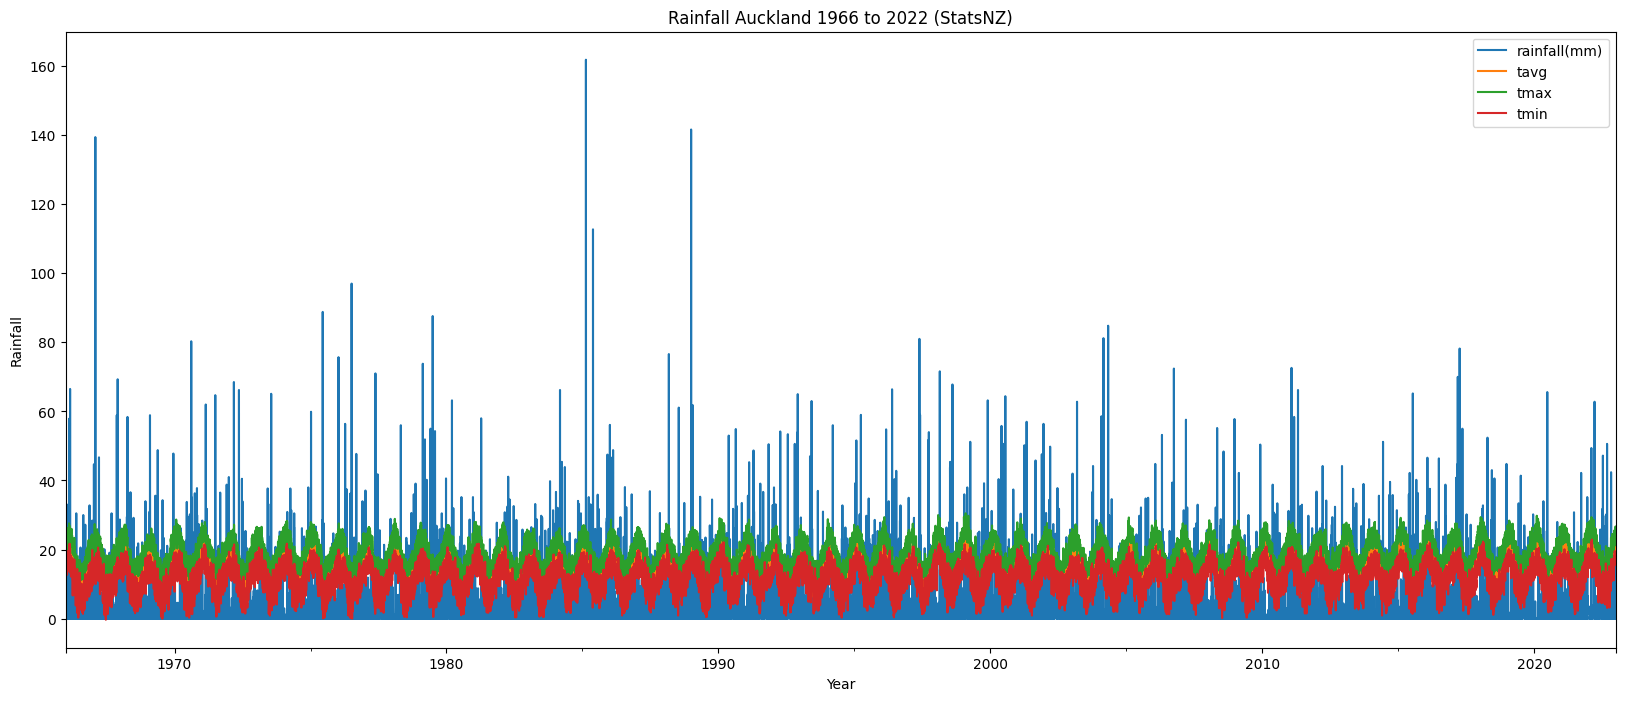

In [24]:
auckland = auckland_rain.set_index('date')
auckland.plot(figsize=(20,8), kind='line',  title='Rainfall Auckland 1966 to 2022 (StatsNZ)', xlabel="Year", ylabel='Rainfall')

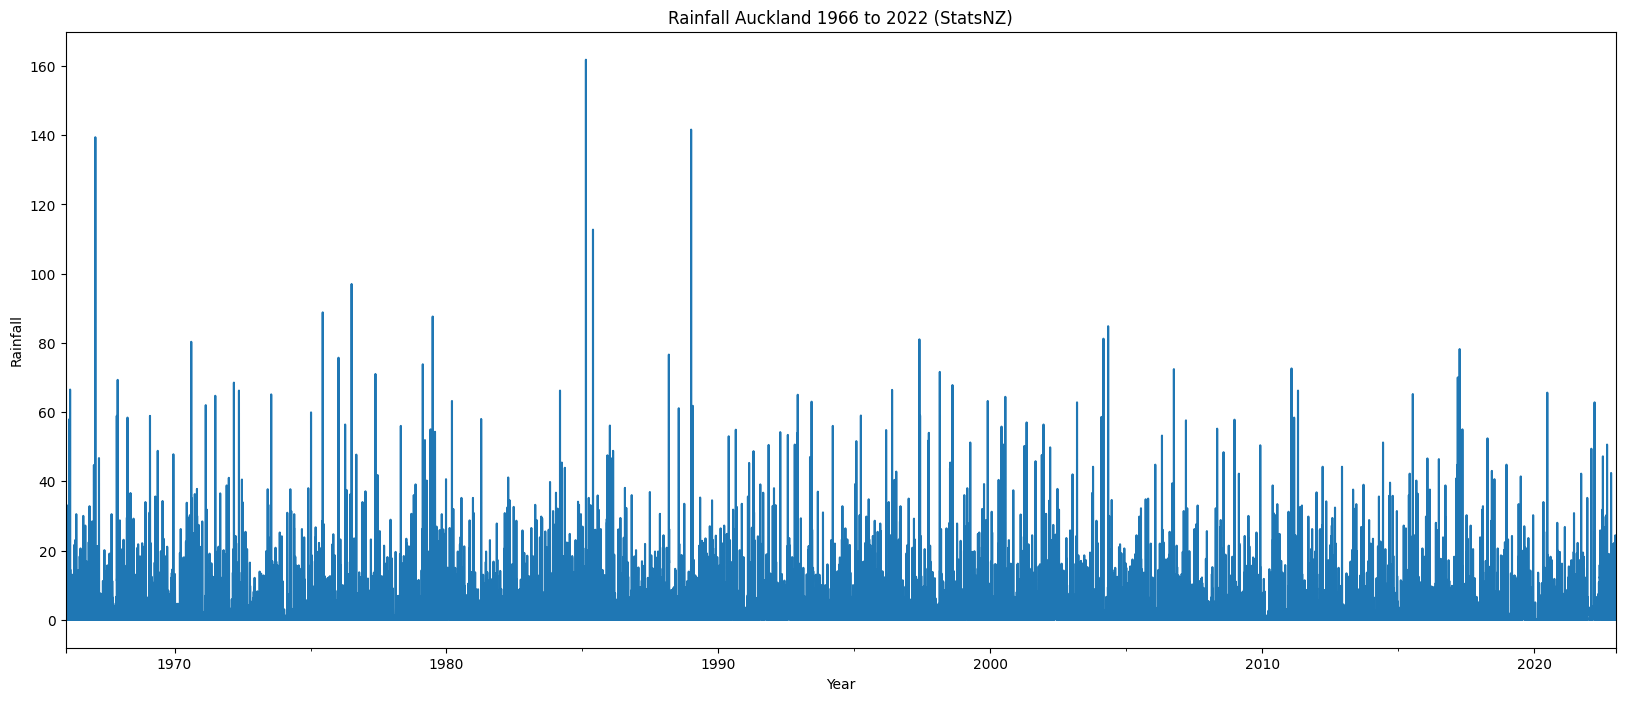

In [25]:
aucklandRain = auckland['rainfall(mm)'].plot(figsize=(20,8), kind='line',  title='Rainfall Auckland 1966 to 2022 (StatsNZ)', xlabel="Year", ylabel='Rainfall')

In [26]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected column, 'rainfall(mm)'
aucklandRain_scaled = scaler.fit_transform(auckland[['rainfall(mm)']])

In [27]:
# Define the sequence length (e.g., 30 days of historical data)
sequence_length = 30

X = []  # Input sequences
y = []  # Target values

for i in range(len(aucklandRain_scaled) - sequence_length):
    X.append(aucklandRain_scaled[i:i+sequence_length])
    y.append(aucklandRain_scaled[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


# Reshape the data for LSTM model input

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM Model

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

ModuleNotFoundError: No module named 'tensorflow'

# Train the Model

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
520/520 [==============================] - 7s 11ms/step - loss: 1.0053
Epoch 2/10
520/520 [==============================] - 6s 11ms/step - loss: 0.9970
Epoch 3/10
520/520 [==============================] - 6s 11ms/step - loss: 0.9947
Epoch 4/10
520/520 [==============================] - 6s 11ms/step - loss: 0.9933
Epoch 5/10
520/520 [==============================] - 5s 10ms/step - loss: 0.9922
Epoch 6/10
520/520 [==============================] - 5s 10ms/step - loss: 0.9911
Epoch 7/10
520/520 [==============================] - 5s 10ms/step - loss: 0.9905
Epoch 8/10
520/520 [==============================] - 5s 10ms/step - loss: 0.9904
Epoch 9/10
520/520 [==============================] - 5s 10ms/step - loss: 0.9905
Epoch 10/10
520/520 [==============================] - 5s 10ms/step - loss: 0.9894


# Evaluate and Make Predictions

In [ ]:
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

130/130 [==============================] - 1s 5ms/step


# Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 45.52025942033778
